<a href="https://colab.research.google.com/github/Sruthi5311/Neural/blob/main/700761799_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Venkata Sruthi Kakumani

700761799



In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# convert from int to float and normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 25
lrate = 0.01
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2808 - loss: 1.9682 - val_accuracy: 0.4435 - val_loss: 1.5557
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.4585 - loss: 1.5013 - val_accuracy: 0.5058 - val_loss: 1.3518
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5269 - loss: 1.3115 - val_accuracy: 0.5778 - val_loss: 1.1854
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5832 - loss: 1.1656 - val_accuracy: 0.5975 - val_loss: 1.1372
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6310 - loss: 1.0381 - val_accuracy: 0.6398 - val_loss: 1.0400
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6690 - loss: 0.9396 - val_accuracy: 0.6509 - val_loss: 1.0182
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6974 - loss: 0.8498 - val_accuracy: 0.6517 - val_loss: 1.0135
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7315 - loss: 

In [4]:
predictions = model.predict(X_test[:4])
print(predictions)
print(np.argmax(predictions, axis=1))
print(y_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
[[9.0493137e-05 3.5544460e-06 1.0513524e-03 8.6421996e-01 2.5292661e-04
  4.4847049e-02 8.9508459e-02 6.9446282e-06 1.8937830e-05 3.2246845e-07]
 [1.2306102e-04 1.9824265e-02 1.6310931e-15 3.1821190e-15 1.4971457e-16
  4.0680568e-20 5.4290497e-17 1.0527474e-15 9.8005265e-01 5.1801994e-09]
 [1.6027251e-01 4.7458173e-04 1.8948433e-05 1.8211316e-04 2.4252893e-05
  1.0510776e-05 6.6901055e-07 1.5879337e-05 8.3725291e-01 1.7476421e-03]
 [9.9908650e-01 5.3143020e-05 4.6577094e-05 3.7005580e-06 1.8299909e-07
  9.6001727e-08 2.5810664e-06 1.3260684e-08 7.8775536e-04 1.9369632e-05]]
[3 8 8 0]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


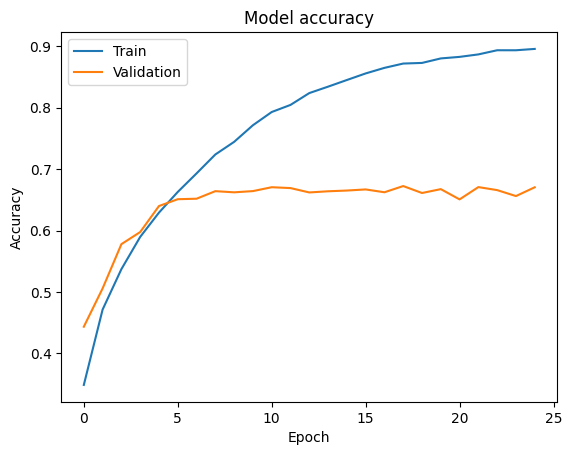

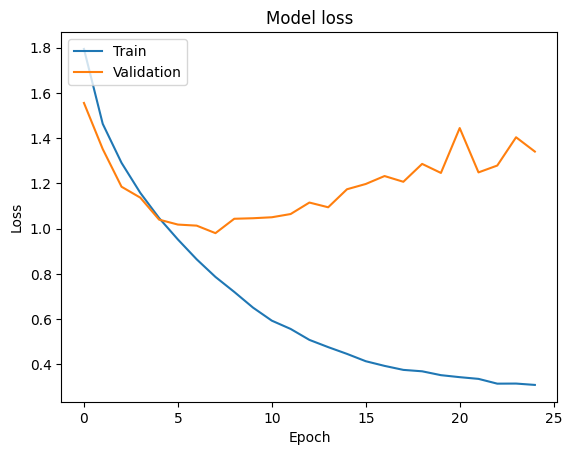

In [5]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

zoom link:

In [ ]:
https://drive.google.com/file/d/1HXORL64LjSmQkjyXrK4PkxpeklSC4VYG/view?usp=drive_link